# This notebook check gender classifier at different depth of dens layer

In [ ]:

import tensorflow as tf

# Check for TensorFlow GPU access
print(f"TensorFlow has access to the following devices:\n{tf.config.list_physical_devices()}")

# See TensorFlow version
print(f"TensorFlow version: {tf.__version__}")

In [1]:
from os import chdir
chdir("../")   # only run this ones else error will occur


In [2]:
import numpy as np
from tensorflow.keras import layers,models
import matplotlib.pyplot as plt
from IPython.display import clear_output

from datetime import datetime

In [3]:
X_train_l = np.load('private/npy/X_train_gender.npy')
X_test_l = np.load('private/npy/X_test_gender.npy')
y_train_l = np.load('private/npy/y_train_gender.npy')
y_test_l = np.load('private/npy/y_test_gender.npy')

In [4]:
# Select 10% of the data randomly
num_samples_train = int(0.25 * len(X_train_l))
num_samples_test = int(0.25 * len(X_test_l))

# Randomly select indices
indices_train = np.random.choice(len(X_train_l), num_samples_train, replace=False)
indices_test = np.random.choice(len(X_test_l), num_samples_test, replace=False)

# Select data based on random indices
X_train_l = X_train_l[indices_train]
y_train_l = y_train_l[indices_train]
X_test_l = X_test_l[indices_test]
y_test_l = y_test_l[indices_test]

In [5]:
def create_model(depth):
    model = models.Sequential()
    model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(128, 130, 1)))
    model.add(layers.MaxPooling2D((2, 2)))

    # only one conv layer is taken
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Flatten())

    for _ in range(depth):
        model.add(layers.Dense(64, activation='relu'))

    model.add(layers.Dense(2, activation='softmax'))

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])


    return model


In [6]:
def train_models(depths, epochs,iterations):
    T1=datetime.now()
    index=0  #used in "Estimated Time Required :" to keep time record

    validation_accuracies = []
    for i in range(iterations):

        validation_accuracie=[]
        for depth in depths:
            print("Iteration :",i+1)
            print("Training model of depth :",depth)
            t1=datetime.now()   


            # Create model
            model = create_model(depth)
            # Train model
            history = model.fit(X_train_l, y_train_l, epochs=epochs, validation_data=(X_test_l, y_test_l), batch_size=64,verbose=1)\
            # Record validation accuracy
            validation_accuracie.append(history.history['val_accuracy'])


            t2=datetime.now()   
            clear_output(wait=False)

            index+=1
            print("Estimated Time Required :",int((t2-t1).seconds)*((len(depths)*iterations)-index)/60," min")

        validation_accuracies.append(validation_accuracie)

    T2=datetime.now()
    clear_output(wait=False)
    print("Time taken :",(T2-T1).seconds,"s")

    return validation_accuracies


In [7]:
depths = [1,2,3,4,5,6] 
epochs = 7
iteration=25

# Train models and save validation accuracies
validation_accuracies=train_models(depths, epochs,iteration)


Time taken : 6203 s


In [8]:
combined_array = np.array(validation_accuracies)

In [9]:
combined_array

array([[[0.44592345, 0.43427619, 0.36605656, ..., 0.50582361,
         0.56239599, 0.56239599],
        [0.44592345, 0.44592345, 0.50582361, ..., 0.88019967,
         0.93344426, 0.93178034],
        [0.55407655, 0.44425955, 0.56405991, ..., 0.56405991,
         0.71880198, 0.74043262],
        [0.55407655, 0.43594009, 0.44592345, ..., 0.59567386,
         0.69717139, 0.78535771],
        [0.56405991, 0.56405991, 0.44592345, ..., 0.44592345,
         0.44592345, 0.56405991],
        [0.56405991, 0.56405991, 0.44592345, ..., 0.44592345,
         0.56405991, 0.56405991]],

       [[0.56905156, 0.56405991, 0.56405991, ..., 0.56405991,
         0.56405991, 0.56405991],
        [0.56405991, 0.56405991, 0.56405991, ..., 0.45424291,
         0.44592345, 0.57071549],
        [0.56405991, 0.56405991, 0.46256238, ..., 0.80366057,
         0.4575707 , 0.44592345],
        [0.61397672, 0.59401   , 0.55407655, ..., 0.47587353,
         0.43594009, 0.63227952],
        [0.55407655, 0.55407655, 0.554

In [10]:
column_averages = np.mean(combined_array, axis=0)

# Print the average of each column
print("Average of each column:", column_averages)

Average of each column: [[0.53291181 0.54682196 0.56545757 0.5802995  0.64465891 0.66389351
  0.65237937]
 [0.53271215 0.56259567 0.55221298 0.63660565 0.65963394 0.66202994
  0.68299501]
 [0.5663228  0.55094842 0.59101498 0.63400998 0.6371381  0.64252912
  0.66542429]
 [0.53524127 0.52645591 0.53497504 0.56792013 0.59873544 0.60386023
  0.62742096]
 [0.52465891 0.54096506 0.53597338 0.53377704 0.57557404 0.56073211
  0.58975042]
 [0.50675541 0.53896839 0.54668885 0.55986689 0.54708819 0.54895175
  0.56459234]]


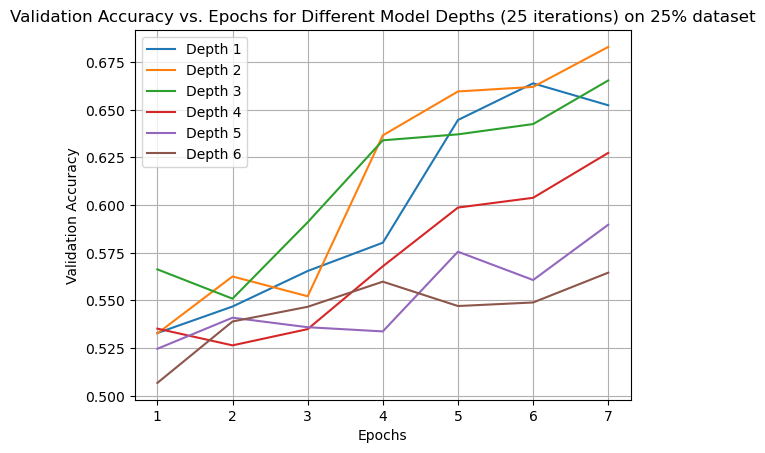

In [12]:
for i, column in enumerate(column_averages):
        plt.plot(np.arange(1, epochs + 1),column, label=f'Depth {i+1}')

plt.xticks(np.arange(1, epochs+1))

plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy vs. Epochs for Different Model Depths ('+str(iteration)+' iterations) on 25% dataset')
plt.legend()
plt.grid(True)

# current_time = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
# filename = f"testing records/validation_accuracy_{current_time}.png"
# plt.savefig(filename)